# Lab: Properties of the Spectrum

## Goals:

In this lab, you will explore various aspects of the spectrum of simple signals. For this lab, you will relay on the functions developed in the pre-lab notes to compute the spectrum. See the pre-lab notes for details.
* The function `analyze_signal()` computes the spectrum from a sampled signal
* The function `synthesize_from_vector` reconstructs the sampled signal from the spectrum
* The function `plot_spectrum` helps you make nice plots of the spectrum

In this lab, you will:

* compute and examine the spectrum of several signals
* explore the relationship between the duration of a signal and the width of the spectrum
* explore the effect that a delay of the signal has on the spectrum

## This notebook is incomplete

In this notebook, there are multiple places for you to fill in either code or text.

You should do that directly in this notebook. 

Once you have completed all your work in this notebook, rerun the entire notebook using "Kernel > Restart and Run All" from the menubar. 

Fix any errors, then remove this cell (your notebook is now complete), and submit.

In [1]:
# import the functions from the pre-lab 
from spectrum_functions import analyze_signal, synthesize_from_vector, plot_spectrum

In [2]:
# import the usual suspects
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

## Experiment: The spectrum of rectangular pulses

In our first experiment, we consider simple rectangular pulses. 

The function below constructs a rectangular pulse consisting of `N` samples of which `pw` are equal to 1 and the remaining samples are equal to 0. 

For a given sample rate $f_s$, these pulses have a period of `N`$/f_s$ seconds and each pulse has a duration of `pw`$/f_s$ seconds.

In [3]:
def make_pulse(N, pw):
    """Construct a rectangular pulse
    
    Parameters:
    -----------
    N - number of samples 
    pw - width of the pulse in samples

    Returns:
    --------
    NumPy arrat of samples
    """
    xx = np.zeros(N)

    if pw % 2 == 0:
        xx[:pw//2] = 1
        xx[-pw//2:] = 1
    elif pw == 1:
        xx[0] = 1
    else:
        xx[:(pw+1)//2] = 1
        xx[-(pw-1)//2:] = 1
    
    return xx

### One period of a periodic signal

Recall that we are assuming that the samples from which the spectrum is computed is one period of a periodic signal. The plot below illustrates this relationship.

It shows a periodic signal, consisting of a sequence of pulses, and highlights the single period from which the spectrum is computed.
* the period is equal to 1 since `N/fs` equals 1
* the pulse duration is `pw/fs` ($23/256 \approx 0.09$ seconds)

<IPython.core.display.Javascript object>


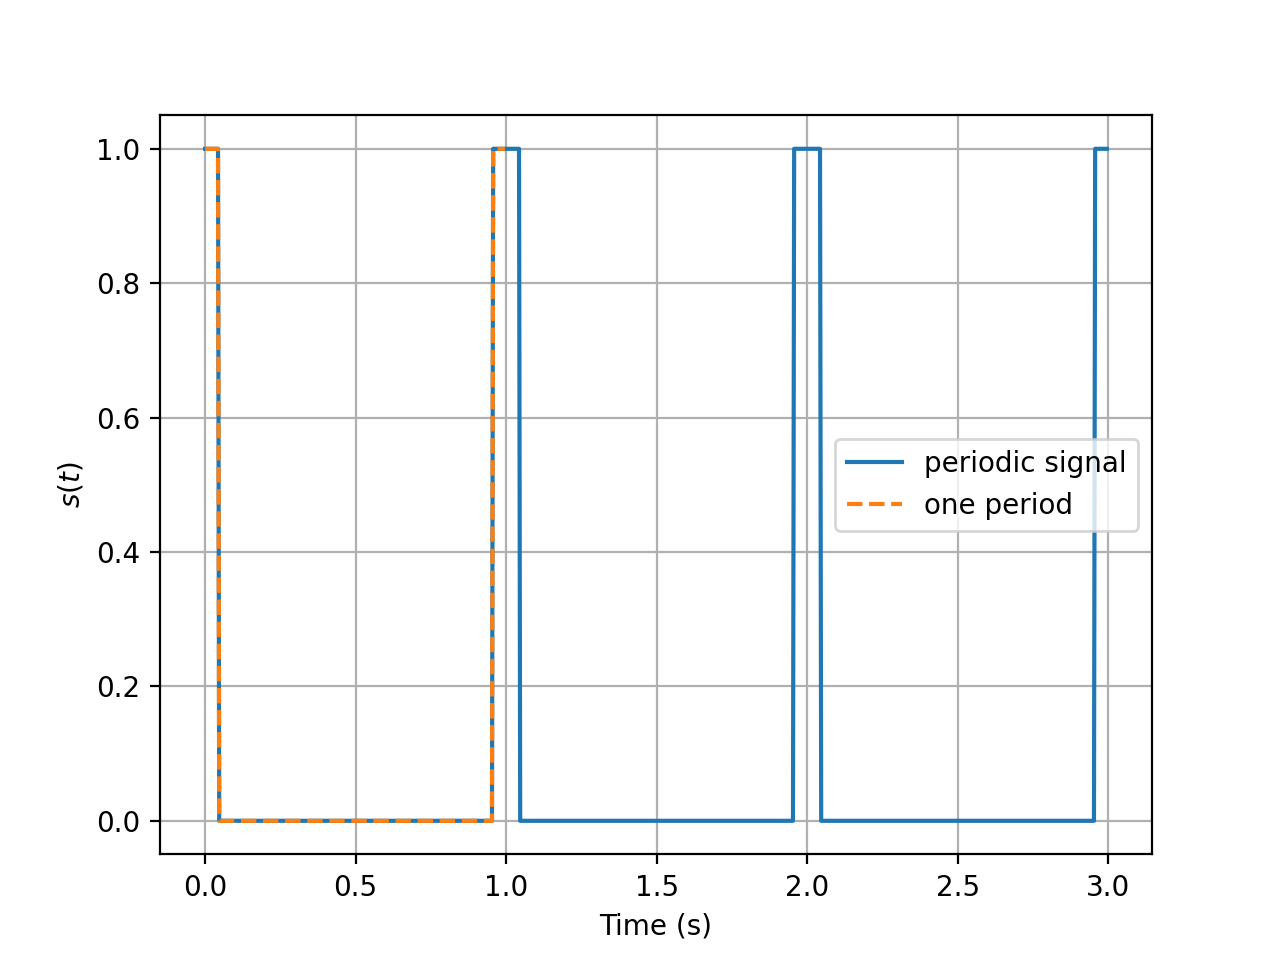

In [4]:
fs = 256
pp = make_pulse(fs, 23)

periodic_sig = np.concatenate((pp, pp, pp))

plt.plot(np.arange(0, 3, 1/fs), periodic_sig, label='periodic signal')
plt.plot(np.arange(0, 1, 1/fs), pp, '--', label='one period')

plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('$s(t)$')
plt.legend()

plt.show()

Note that the pulse during the period from $t=0$ to $t=1$ is split into two halves. The width of the pulse is the sum of the width of the two halves.

### Spectrum of rectangular pulse

Using the functions developed in the pre-lab notes, we can easily compute and plot the spectrum of this signal. Only a single period is used to compute the spectrum.

<IPython.core.display.Javascript object>


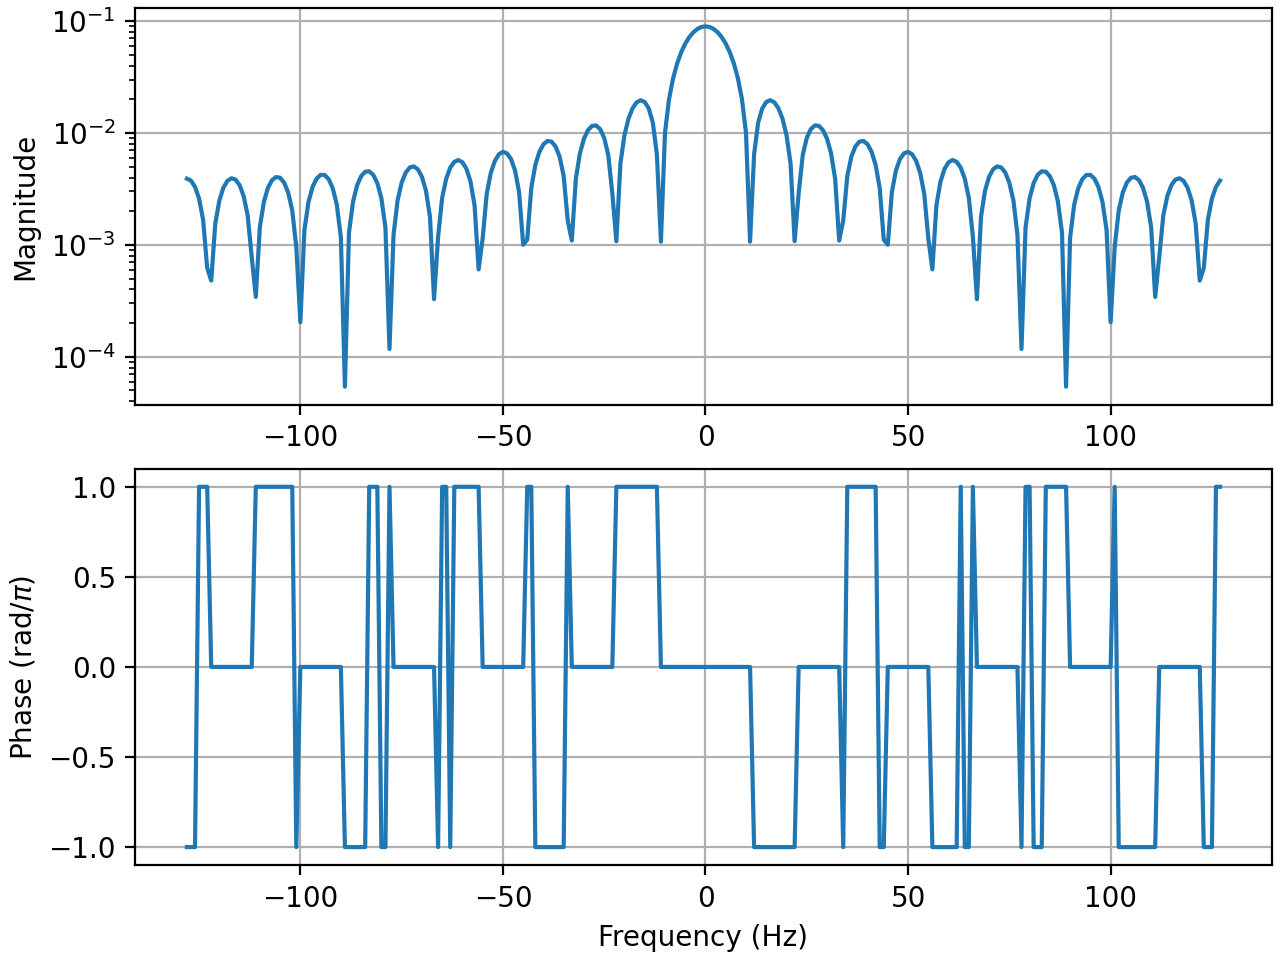

In [5]:
# compute the spectrum
Pv = analyze_signal(pp)

# plot it
plot_spectrum(Pv, fs, doStem=False)

* The magnitude of the spectrum is largest near frequency zero and then drops off quickly at higher frequencies.
  - The magnitude takes very small values repeatedly across the spectrum
  - The first of these minima occurs near frequencies $f=\pm 11$
  - The width between these first minima is a useful measure for the **bandwidth** of the signal
     + the bandwidth of this signal is approximately 22 Hz

* The phase of this signal appears somewhat erratic. 
  - it takes on only three values: 0, $\pi$, and $-\pi$
  - Hence the spectrum is purely real
  - Note that the phase change from 0 to $\pm \pi$ coincide with the locations of the minima

We will focus on the magnitude of the spectrum
 

## Task: Explore the relationship between pulse duration and bandwidth

* Generate multiple versions of the rectangular pulse signal with different pulse width.
  - recall that the pulse duration is `pw/fs`
  - good values to try are relatively small odd values for `pw`, e.g., 3, 7, 11, ..., 23
* For each pulse, compute and plot the spectrum
* Then measure the bandwidth of the signal:
  - measure the difference between the two minima closest to $f=0$

* Compile your results in two vectors:
  - vector `pulse_dur` stores the pulse durations
  - vector `bandwidth` stores the bandwidths you measured

* plot the pulse duration versus  bandwidth
* identify how the bandwidth varies with pulse duration (e.g., a stement like "the bandwidth is proportional to the square of the pulse duration") 

In [6]:
## Put your code to perform measurements in this cell

In [7]:
## plot the relationship between pulse duration and bandwidth in this cell

Use this cell to explain the relationship between pulse duration and bandwidth

## Experiment: The impact of delay on the spectrum

An extreme version of the rectangular pulse occurs when only a single sample of the signal is equal to 1, i.e., when `pw = 1` in `make_pulse()`. 

This signal is called the **unit impulse** signal.

In that case, the magnitude of the spectrum is constant across all frequencies and the phase is equal to zero.

<IPython.core.display.Javascript object>


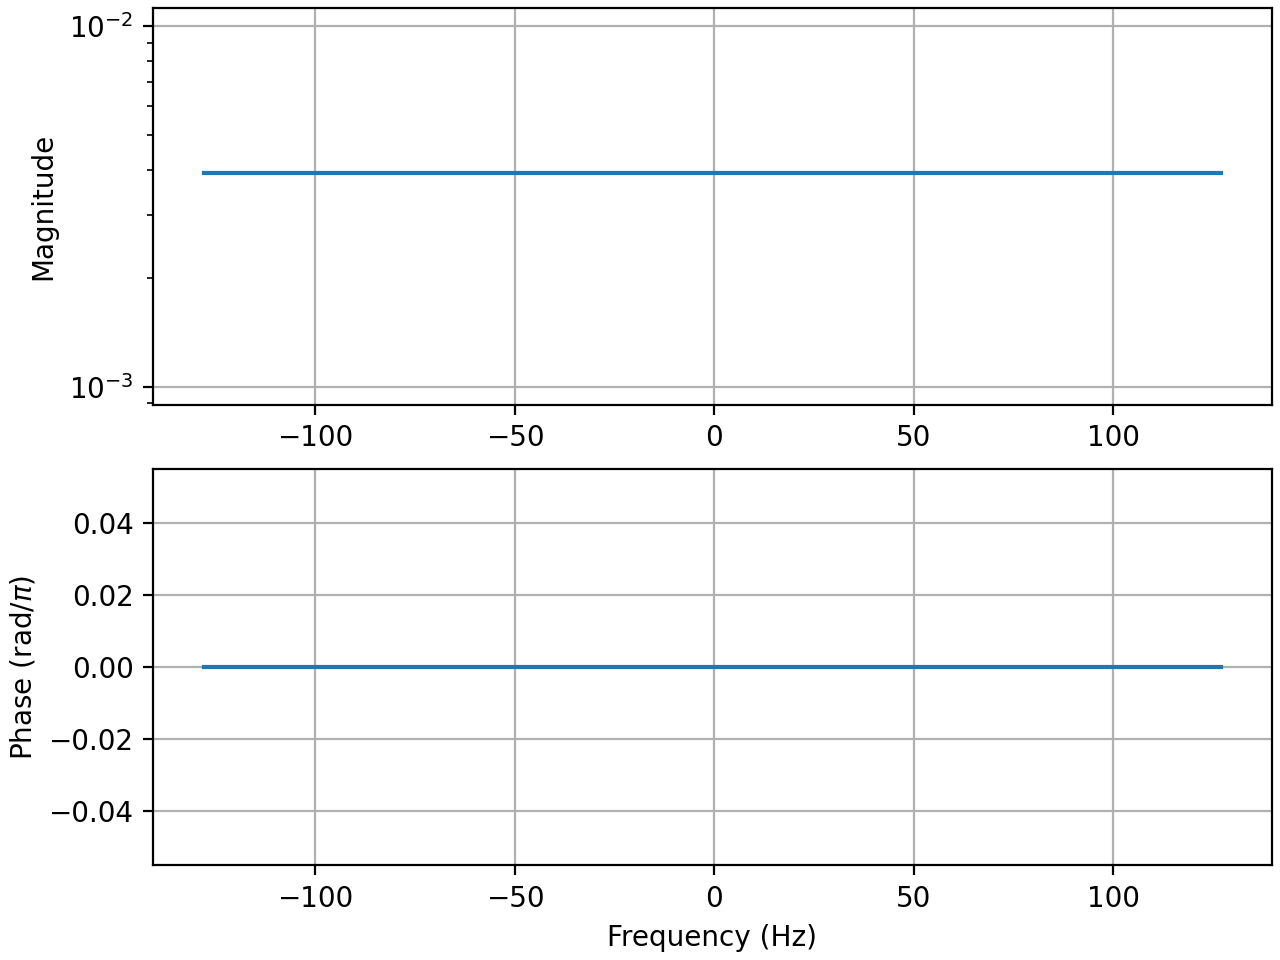

In [8]:
# make a unit impulse
pp = make_pulse(fs, 1)

# compute and plot the spectrum
Pv = analyze_signal(pp)
plot_spectrum(Pv, fs)

### Delaying the unit impulse

* When the unit impulse signal is delayed by $d$ samples, the spectrum changes
  - recall that the `np.roll()` function can be used to delay the signal
  - a delay of $d$ samples corresponds to a delay of `d/fs` seconds
* Our goal is to quantify how the delay affects the spectrum

Let's consider a delay of one sample:

<IPython.core.display.Javascript object>


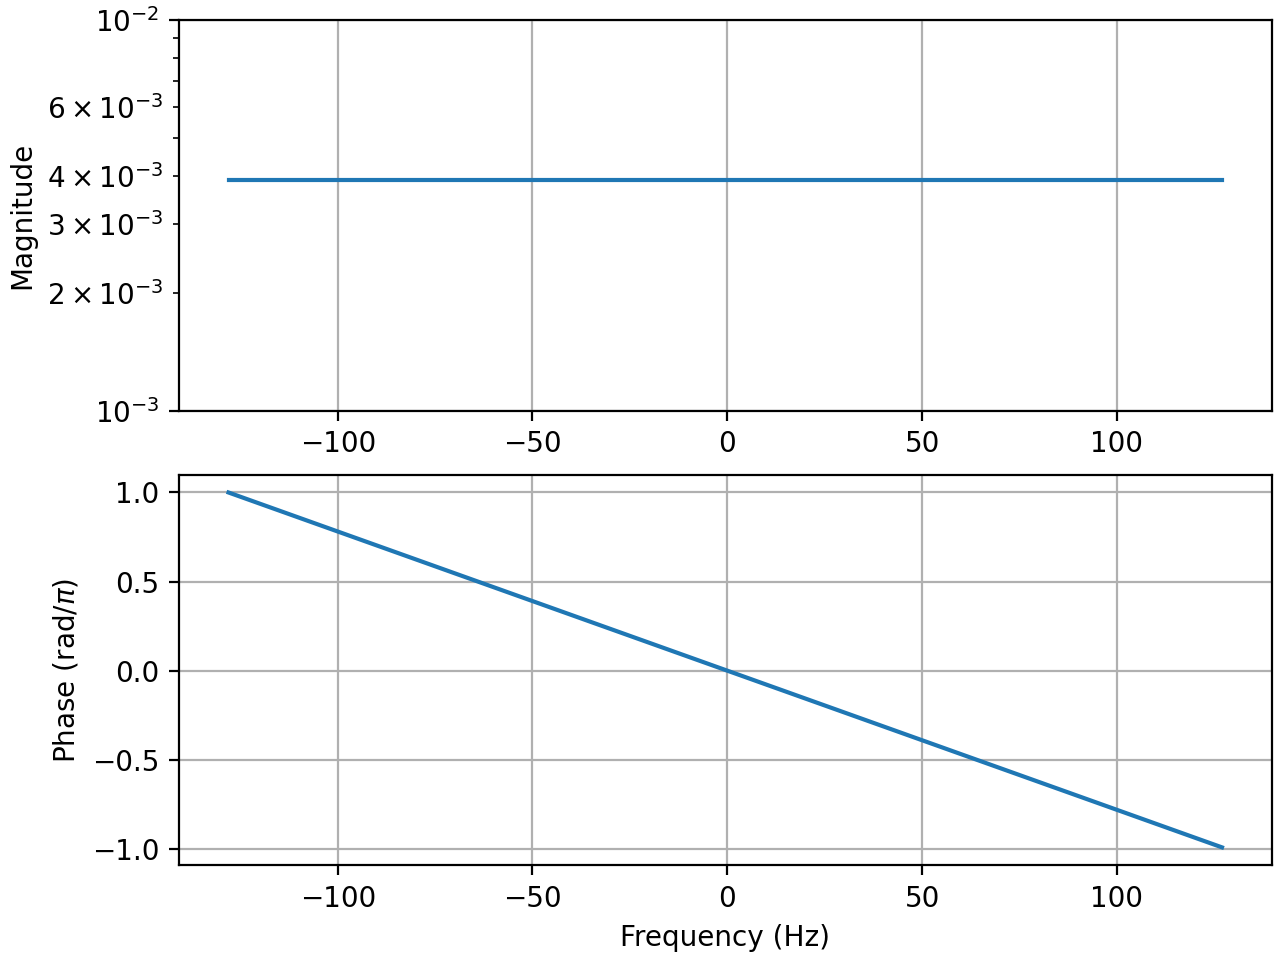

In [9]:
# Delay the impulse by one sample
d_pp = np.roll(pp, 1)

# compute and plot the spectrum
d_Pv = analyze_signal(d_pp)
plot_spectrum(d_Pv, fs)

We observe that:
* the magnitude of the spectrum does not change
* the phase changes:
  - the phase decreases linearly
  - the phase chages from $\pi$ to $-\pi$ over the span of $f_s=256$ Hz
    - Hence the slope of the phase is $-2\pi/f_s$
  - the phase can be described by $\phi(f) = -2\pi f \cdot 1/f_s$

### Task: Derive a general relationship between phase and delay

* Repeat the above experiment for other delays
  - keep the values of the delay small; `d=2` and `d=3` are good values
* measure the slope of the phase for each case and derive an equation that describes how the phase changes with frequency for a given delay
  - You will see that the phase "jumps" whenever it crosses $\pm \pi$.
  - What should you do about that?
* The ultimate goal is to derive an equation that describes how the phase changes with frequency and delay

In [10]:
## use this cell to conduct your measurements
# 1. generate a delayed signal

# 2. compute and plot the spectrum of the delayed signal, then measure the slope of the phase

In this cell, do the following:

* For each of the delays you considered, document the slope of the phase.
* Then, derive a general expression that describes how the phase varies as a function of frequency $f$ and delay $d$.

## Experiment: the effect of multiplication by a sinusoid on the spectrum

In our final experiment, we consider what happens when a signal is multiplied by a sinusoid.

Specifically, we return to the rectangular pulses tha we considered earlier. 

To establish a base-line, we plot the spectrum of the rectangular pulse; this time we choose a relatively long pulse duration.

<IPython.core.display.Javascript object>


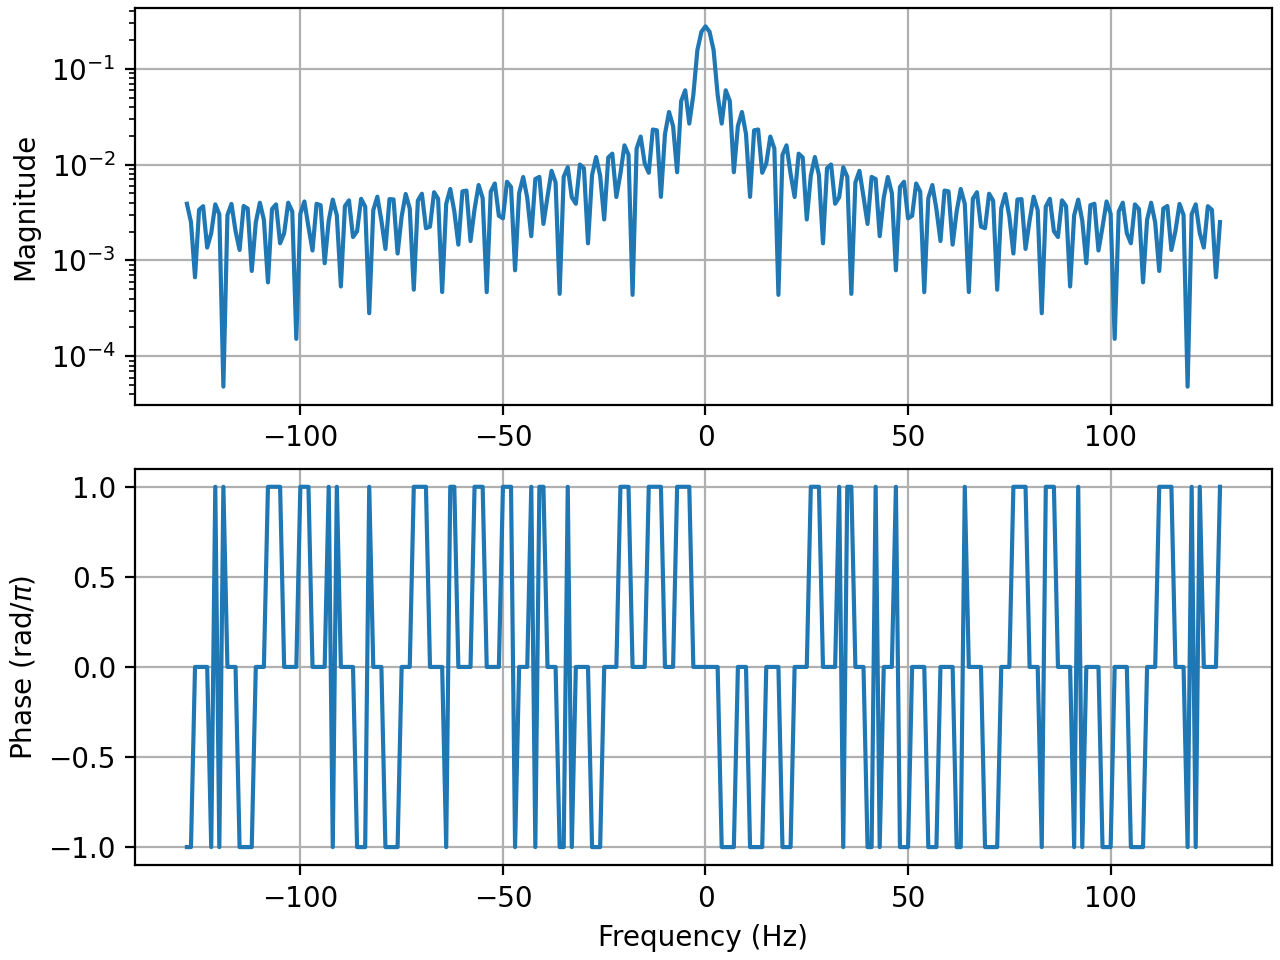

In [11]:
# make a rectangular pulse pulse
pp = make_pulse(fs, 71)

# compute and plot its spectrum
Pv = analyze_signal(pp)
plot_spectrum(Pv, fs)

### Multiplication by a sinusoid

Next, we multiply the pulse by a sinsoid of frequency 50 Hz.

Then, we measure the spectrum of the resulting signal.

<IPython.core.display.Javascript object>


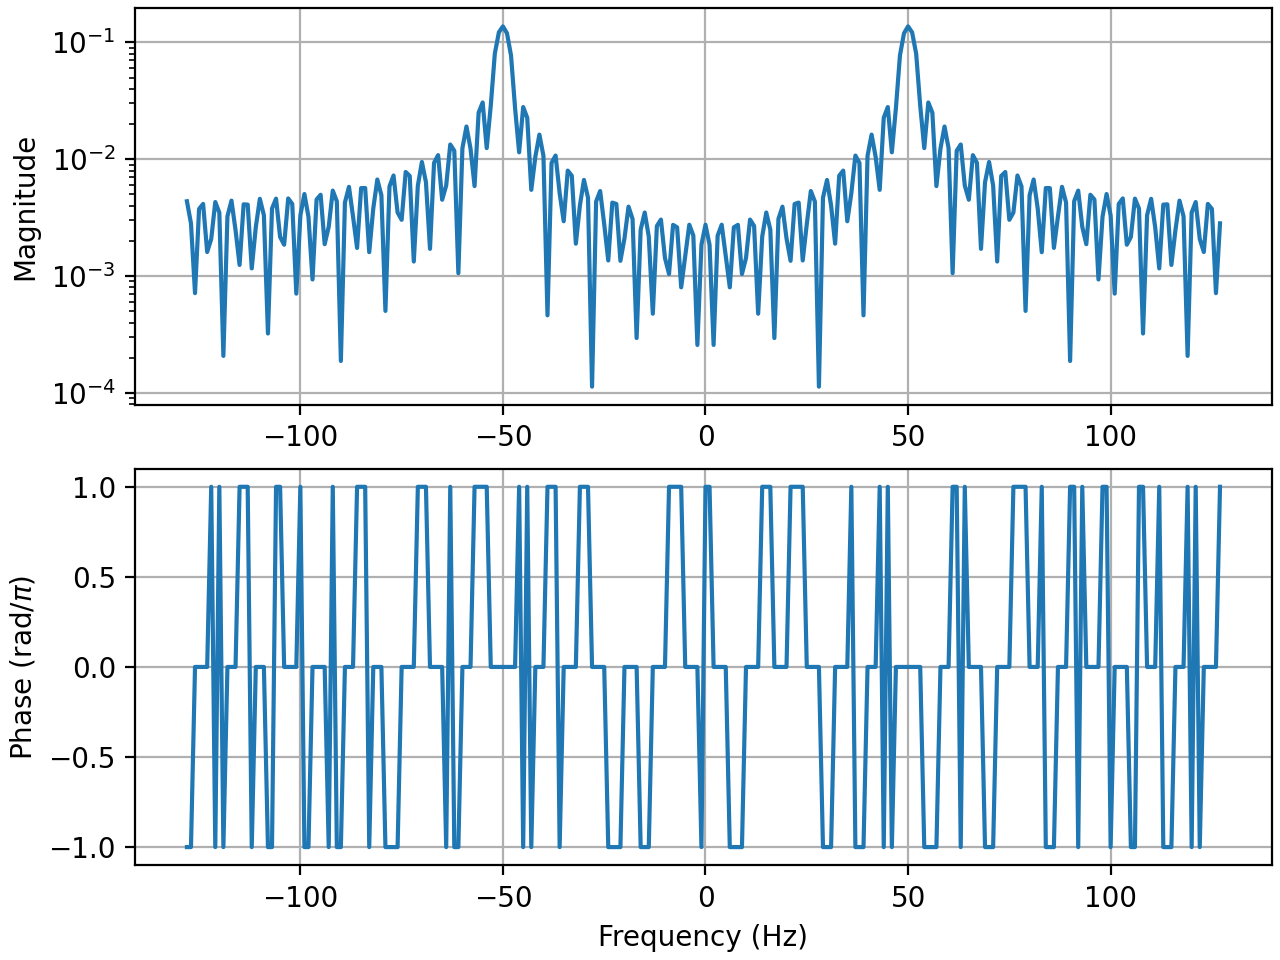

In [12]:
## multiply the pulse by a sinusois
# make the sinsoid
f = 50
tt = np.arange(0, 1, 1/fs)
cos_sig = np.cos(2*np.pi * f * tt)

# compute spectrum for pulse times sinusoid
Pvc = analyze_signal(pp * cos_sig)
plot_spectrum(Pvc, fs)

### Task: Describe how multiplication by a sinusoid affects the spectrum

* Compare the original spectrum of the rectangular pulse and the spectrum of the product of pulse and sinusoid
  - focus on the magnitude
* How does the frequency of the sinusoid affect the spectrum?
* Is there an impact on the maximum value of the spectrum?
* Describes via a formula how the spectrum of the product of pulse and sinusoid is related to the sectrum of the pulse
  - verify your hypothesis by testing with a different frequency (frequencies should be between 20 and 80 to avoid artifacts)

Use this cell to document your comparison and to establish the relationship between the spectra.

In [13]:
# use this cell for experimentation with other frequencies

## Summary

We have performed multiple experiments to discover properties of the spectrum of (simple) signals.

1. We studied the relationship between the duration of rectangular pulses and their bandwidth
2. We analyzed how delaying a signal affects the spectrum of the signal
3. We explored how multiplication by a sinusoidal signal affects the spectrum

### Deliverables

Submit your complete copy of this notebook on Gradescope!
* This is the report for lab 5.
* complete all the incomplete cells in this notebook
* remove the cell that states that this notebook is incomplete.
* **IMPORTANT** you must convert this notebook to PDF and upload a PDF copy - Do **NOT** upload the `.ipynb` notebook.
